In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
import os

image_path = '/content/gdrive/MyDrive/HEPIUS/Images/'
image_files = [os.path.join(image_path, f) for f in os.listdir(image_path) if os.path.isfile(os.path.join(image_path, f))]

ic = 1
save_path = '/content/gdrive/MyDrive/HEPIUS/Results/'

In [ ]:
from skimage.transform import resize
import cv2
from skimage.segmentation import chan_vese
import numpy
from skimage import measure

In [ ]:
start_row, start_col = 250, 325
end_row, end_col = 550, 950



In [ ]:
# Setting up parameters for the loop

# kernel for dilation and erosion
kernel = np.ones((5, 5), np.uint8)

# parameters for chan vese seg
lambda1 = 1
lambda2 = 1
iterations = 20000
init_level_set = "checkerboard"
dt = 0.75

Completion of image 80
Exception in image 81
Completion of image 82
Completion of image 83
Completion of image 84
Completion of image 85
Completion of image 86
Completion of image 87
Completion of image 88
Completion of image 89
Completion of image 90
Completion of image 91
Exception in image 92
Completion of image 93
Completion of image 94
Completion of image 95
Completion of image 96
Exception in image 97
Completion of image 98
Completion of image 99


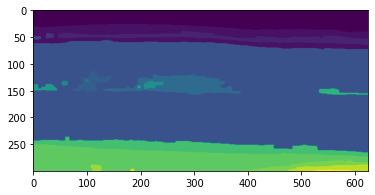

In [ ]:
#counter to limit images
ic = 1   

# Running a loop for all images in directory

for image_file in image_files:
  if ic<80:
    ic += 1
    continue
  else:
    # Read the dicom image
    dicom_image = pydicom.dcmread(image_file)
    image = dicom_image.pixel_array

    # filtering multidimensional images
    try:
      plt.imshow(image, cmap="gray")
      plt.savefig(save_path + '/OriginalImage/image' + str(ic), bbox_inches = 'tight')
    except:
      print("Exception in image " + str(ic))
      del image
      ic += 1
      continue

    # crop the image to focus on the vein
    cropped_image = image[start_row:end_row, start_col:end_col]

    # initialize threshold
    threshold = 80
    cropped_image[cropped_image < threshold] = 0
    plt.imshow(cropped_image, cmap="gray")
    plt.savefig(save_path + '/Crop/crop' + str(ic), bbox_inches = 'tight')
    
    # resize the image for segmentation
    resized_image = cropped_image[:,:,0]


    # preprocess the image using dilation and erosion
    img_dil = cv2.dilate(resized_image, kernel, iterations=1)
    img_er = cv2.erode(img_dil, kernel, iterations=1)
    plt.imshow(img_er)
    plt.savefig(save_path + '/PreSeg/pre_seg' + str(ic), bbox_inches = 'tight')
    
    # Applying Chan Vese Segmentation
    seg = chan_vese(img_er, mu=0.25, lambda1=lambda1, lambda2=lambda2, tol=1e-3, max_num_iter=iterations, init_level_set=init_level_set, dt=dt)
    plt.imshow(seg)
    plt.savefig(save_path + '/PostSeg/post_seg' + str(ic), bbox_inches = 'tight')
    
    # Initialize array for label
    grey = numpy.ones((len(seg),len(seg[0])))
    for i in range(0,len(seg)):
      for j in range(0,len(seg[0])):
        if seg[i][j] == False:
          grey[i][j] = 1
        else:
          grey[i][j] = 250

    # Applying labels
    labels = measure.label(grey)
    plt.imshow(labels)
    plt.savefig(save_path + '/Label/label' + str(ic), bbox_inches = 'tight')
    print("Completion of image " + str(ic))
    ic += 1
    


